In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

# DATA Understanding 

In [2]:
! ls ../data


column_names.md   kc_house_data.csv


In [3]:
df = pd.read_csv('../data/kc_house_data.csv')

In [4]:
df.shape

(21597, 21)

we have the information of 21597 houses located in King county washington 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We can see above, dataset has null values in some columns

### Price column

In [7]:
df['price']

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21592    360000.0
21593    400000.0
21594    402101.0
21595    400000.0
21596    325000.0
Name: price, Length: 21597, dtype: float64

### ID column

duplicate values on 'id' column, some houses show up more than once on dataset

In [8]:
df['id'].value_counts()

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

In [9]:
df.loc[df["id"]==2044500213]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15787,2044500213,6/17/2014,310000.0,4,2.0,1870,6000,1.5,NO,NONE,...,7 Average,1870,0.0,1956,NaN,98125,47.7155,-122.315,1520,7169
15788,2044500213,1/26/2015,449000.0,4,2.0,1870,6000,1.5,NO,NONE,...,7 Average,1870,0.0,1956,0.0,98125,47.7155,-122.315,1520,7169


House appering 2 or more times, has different price changing over time, will consider keeping latest price, or keeping duplicates since they can be trated as sale data points, not houses alone

### Bedrooms

In [10]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

house with 33 bedrooms, looked for id number and found out it has only 3 bed rooms, value will be replaced, same for house with 11 rooms, zillow shows it has only 4 rooms.

In [11]:
df.loc[df["bedrooms"]==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,NO,NONE,...,7 Average,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


### Waterfront column

above we can see on waterfront value, the 3 row has null value, for a NO response

In [12]:
# Whether the house is on a waterfront
#   * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, 
#     Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts

# column has 2353 null values, those might be taken as NO 

#categorical, has some null values
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [13]:
df['waterfront'].isnull().sum()

2376

In [14]:
df['waterfront'].mode()

0    NO
dtype: object

### Date

data set goes back to 2014 and most recent data points are from 2015

In [15]:
# Dates
df['date'].value_counts()

6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
            ... 
8/3/2014       1
2/15/2015      1
5/27/2015      1
5/24/2015      1
1/10/2015      1
Name: date, Length: 372, dtype: int64

### View

Categorical data

In [16]:
# Quality of view from house
# categorical data
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

### Condition

In [17]:
# categorical data
df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

### Grade

In [18]:
# categorical data
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

### sqft_basement

In [19]:
# numeric data needed to convert from str to int data type
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
276.0         1
2400.0        1
768.0         1
2310.0        1
1920.0        1
Name: sqft_basement, Length: 304, dtype: int64

/




# Data Preparation

Our target

In [20]:
df['price']

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21592    360000.0
21593    400000.0
21594    402101.0
21595    400000.0
21596    325000.0
Name: price, Length: 21597, dtype: float64

In [21]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [22]:
df['price'].isna().sum()

0

### Cleaning ID column
will drop duplicate values from id column, keeping most recent record of the house

In [23]:
df.drop_duplicates(subset='id', keep='last', inplace=True)

In [24]:
df.loc[df["id"]==2044500213]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15788,2044500213,1/26/2015,449000.0,4,2.0,1870,6000,1.5,NO,NONE,...,7 Average,1870,0.0,1956,0.0,98125,47.7155,-122.315,1520,7169


In [25]:
df['id'].isna().sum()

0

### cleaning bedroom column

will replace outlier/incorrect values from bedrooms column

In [26]:
df["bedrooms"].value_counts()

3     9731
4     6849
2     2736
5     1586
6      265
1      191
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [27]:
df.loc[df["bedrooms"]==33, 'bedrooms'] = 3
df.loc[df["bedrooms"]==11, 'bedrooms'] = 4

In [28]:
df['bedrooms'].isna().sum()

0

### Cleaning Waterfront column

In [29]:
df['waterfront'].value_counts()

NO     18921
YES      146
Name: waterfront, dtype: int64

will change NaN values to NO since, since it is the most frequent value under that column

In [30]:
df['waterfront'].isnull().sum()

2353

In [31]:
df['waterfront'] = df['waterfront'].replace(np.nan, 'NO')


In [32]:
df['waterfront'].value_counts()[0]+df['waterfront'].value_counts()[1]

21420

In [33]:
df['waterfront'].isna().sum()

0

### Cleaning view column

In [34]:
df['view'].value_counts()

NONE         19253
AVERAGE        956
GOOD           505
FAIR           329
EXCELLENT      314
Name: view, dtype: int64

In [35]:
df['view'].isna().sum()

63

In [36]:
df['view'] = df['view'].replace(np.nan, 'NONE')

In [37]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NO,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [38]:
df['view'].isna().sum()

0

### Cleaning sqft_basement column

Will proceed and transform data on sqft_basement column from str to a int type

In [39]:
df['sqft_basement'].value_counts()

0.0       12716
?           452
600.0       216
500.0       206
700.0       206
          ...  
768.0         1
2310.0        1
1816.0        1
417.0         1
1920.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [40]:
df['sqft_basement'].isna().sum()

0

no Nan values,  '?' is a frequent value on the column

In [41]:
df.head(5)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Something I noticed is how  sqft_living value is the total sqft living area in the house + basement, 
and if the basement column shows 0.0 or '?' sqft_living is same as sqft_above, 
so we should consider changing '?' to 0.0, and have a  full numeric column we can work with later on


In [42]:
# Changed all '?' to '0.0'
df.loc[df['sqft_basement'] == '?', 'sqft_basement'] = '0.0'


will change object type data to int

In [43]:
df['sqft_basement'] = df['sqft_basement'].replace(',','.').astype(float)

In [44]:
type(df['sqft_basement'][0])

numpy.float64

# Droping columns
- date
- view
- sqft_above
- sqft_basement
- yr_renovated
- zipcode
- lat
- long
- sqft_living15
- sqft_lot15

In [45]:
df = df.drop(['date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated',
         'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], axis=1)

In [46]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NO,Average,7 Average,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987


#  Modeling / Exploration

In [47]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built
id,1.000000,-0.018450,0.002240,0.004343,-0.013451,-0.132648,0.018139,0.021171
price,-0.018450,1.000000,0.317457,0.525215,0.701295,0.088789,0.254972,0.051012
bedrooms,0.002240,0.317457,1.000000,0.529378,0.594845,0.033782,0.183536,0.161286
bathrooms,0.004343,0.525215,0.529378,1.000000,0.755522,0.087779,0.501803,0.506252
sqft_living,-0.013451,0.701295,0.594845,0.755522,1.000000,0.172586,0.352868,0.316646
sqft_lot,-0.132648,0.088789,0.033782,0.087779,0.172586,1.000000,-0.005561,0.052312
floors,0.018139,0.254972,0.183536,0.501803,0.352868,-0.005561,1.000000,0.488935
yr_built,0.021171,0.051012,0.161286,0.506252,0.316646,0.052312,0.488935,1.000000


# working on categorical and discrete columns

- floors
- waterfront
- condition
- grade
- yr_built

# Price and floors

In [48]:
df['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

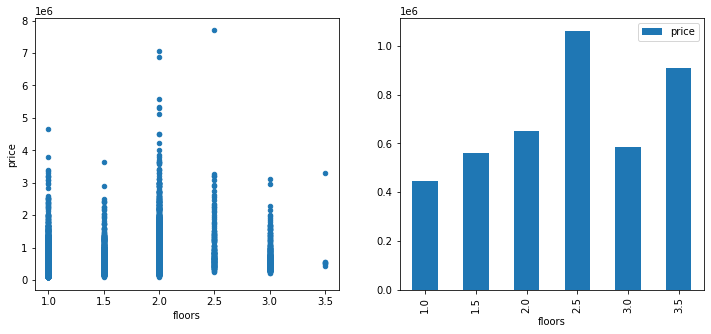

In [49]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

df.plot.scatter(x="floors", y="price", ax=ax1)
df.groupby("floors").mean().plot.bar(y="price", ax=ax2);

In [50]:
Y = np.log(df["price"])
y = df['price']
X_floors = df['floors']

Xcon_floors = sm.add_constant(X_floors)


modelf = sm.OLS(Y, Xcon_floors).fit()
modelf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2248.
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        08:35:10   Log-Likelihood:                -15474.
No. Observations:               21420   AIC:                         3.095e+04
Df Residuals:                   21418   BIC:                         3.097e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.6051      0.010   1257.057      0.000      12.585      12.625
floors         0.2989      0.006     47.416      0.000       0.287       0.311
==============================================================================
Omnibus:                      873.030   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1077.150
Skew:                           0.452   Prob(JB):                    1.26e-234
Kurtosis:                       3.624   Cond. No.                         6.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

normality assumptions

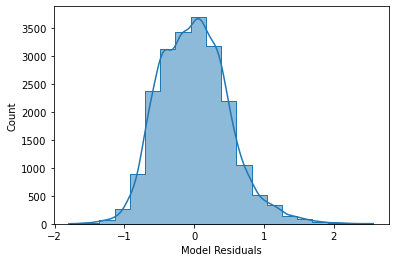

In [51]:
fig, ax = plt.subplots()
sns.histplot(modelf.resid, bins=20, element="step", kde=True, ax=ax)
ax.set_xlabel("Model Residuals")
fig.suptitle("");

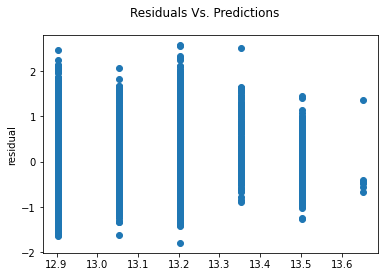

In [52]:
model_preds = modelf.predict(Xcon_floors)
resids = Y - model_preds

fig, ax = plt.subplots()

ax.scatter(model_preds, resids)
ax.set_xlabel('')
ax.set_ylabel('residual')
plt.suptitle('Residuals Vs. Predictions');

### Price and  waterfront

In [53]:
y = df['price']
x_waterfront = pd.get_dummies(df['waterfront'], drop_first=True)

xcon_waterfront = sm.add_constant(x_waterfront)


modelw = sm.OLS(Y, xcon_waterfront).fit()
modelw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     650.4
Date:                Thu, 27 Oct 2022   Prob (F-statistic):          2.32e-141
Time:                        08:35:11   Log-Likelihood:                -16223.
No. Observations:               21420   AIC:                         3.245e+04
Df Residuals:                   21418   BIC:                         3.247e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0448      0.004   3686.929      0.000      13.038      13.052
YES            1.0930      0.043     25.503      0.000       1.009       1.177
==============================================================================
Omnibus:                      622.731   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              740.429
Skew:                           0.373   Prob(JB):                    1.65e-161
Kurtosis:                       3.521   Cond. No.                         12.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

NameError: name 'model4' is not defined

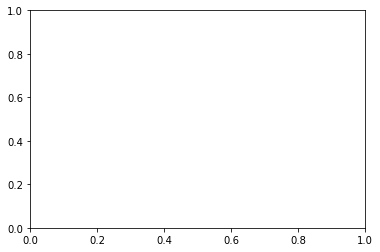

In [54]:
fig, ax = plt.subplots()
sns.histplot(model4.resid, bins=20, element="step", kde=True, ax=ax)
ax.set_xlabel("Model Residuals")
fig.suptitle("");

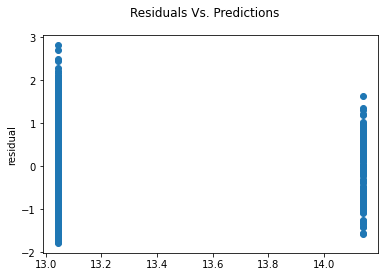

In [55]:
model_preds = modelw.predict(xcon_waterfront)
resids = Y - model_preds

fig, ax = plt.subplots()

ax.scatter(model_preds, resids)
ax.set_xlabel('')
ax.set_ylabel('residual')
plt.suptitle('Residuals Vs. Predictions');

### Price vs condition

In [56]:
df['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [57]:
y = df['price']
x_condition = pd.get_dummies(df['condition'], drop_first=True)

xcon_condition = sm.add_constant(x_condition)


modelc = sm.OLS(Y, xcon_condition).fit()
modelc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     69.67
Date:                Thu, 27 Oct 2022   Prob (F-statistic):           1.03e-58
Time:                        08:35:12   Log-Likelihood:                -16404.
No. Observations:               21420   AIC:                         3.282e+04
Df Residuals:                   21415   BIC:                         3.286e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0611      0.004   2958.487      0.000      13.052      13.070
Fair          -0.5045      0.041    -12.267      0.000      -0.585      -0.424
Good          -0.0460      0.008     -5.601      0.000      -0.062      -0.030
Poor          -0.5145      0.098     -5.225      0.000      -0.707      -0.321
Very Good      0.0991      0.013      7.384      0.000       0.073       0.125
==============================================================================
Omnibus:                      941.560   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1200.898
Skew:                           0.463   Prob(JB):                    1.69e-261
Kurtosis:                       3.699   Cond. No.                         28.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

NameError: name 'model3' is not defined

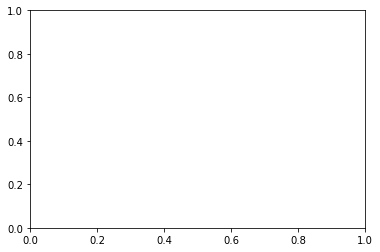

In [58]:
fig, ax = plt.subplots()
sns.histplot(model3.resid, bins=20, element="step", kde=True, ax=ax)
ax.set_xlabel("Model Residuals")
fig.suptitle("");

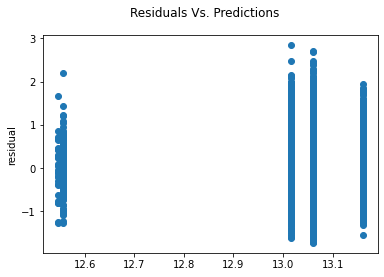

In [59]:
model_preds = modelc.predict(xcon_condition)
resids = Y - model_preds

fig, ax = plt.subplots()

ax.scatter(model_preds, resids)
ax.set_xlabel('')
ax.set_ylabel('residual')
plt.suptitle('Residuals Vs. Predictions');

# price and Grade

In [60]:
df['grade'].value_counts()

7 Average        8889
8 Good           6041
9 Better         2606
6 Low Average    1995
10 Very Good     1130
11 Excellent      396
5 Fair            234
12 Luxury          88
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [61]:
df.loc[df['grade'] == '13 Mansion']

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
4407,2470100110,5570000.0,5,5.75,9200,35069,2.0,NO,Average,13 Mansion,2001
4807,9831200500,2480000.0,5,3.75,6810,7500,2.5,NO,Average,13 Mansion,1922
5446,7237501190,1780000.0,4,3.25,4890,13402,2.0,NO,Average,13 Mansion,2004
6035,1725059316,2390000.0,4,4.00,6330,13296,2.0,NO,Average,13 Mansion,2000
7028,853200010,3800000.0,5,5.50,7050,42840,1.0,NO,Good,13 Mansion,1978
7245,6762700020,7700000.0,6,8.00,12050,27600,2.5,NO,Good,13 Mansion,1910
7900,1068000375,3200000.0,6,5.00,7100,18200,2.5,NO,Average,13 Mansion,1933
9245,9208900037,6890000.0,6,7.75,9890,31374,2.0,NO,Average,13 Mansion,2001
10362,3303850390,2980000.0,5,5.50,7400,18898,2.0,NO,Average,13 Mansion,2001
13398,2426039123,2420000.0,5,4.75,7880,24250,2.0,NO,Average,13 Mansion,1996


In [62]:
df.drop(7245, inplace = True)

In [63]:
df.drop(9245, inplace = True)

In [64]:
df.drop(3910, inplace = True)

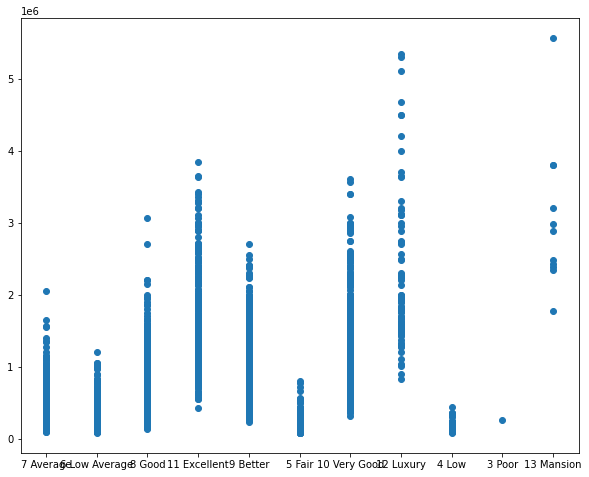

In [65]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x=df['grade'], y=df["price"]);

In [66]:
df11 = df.loc[df['grade'] == '11 Excellent']
df11.loc[df11['price'] == df11['price'].max()]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
2083,8106100105,3850000.0,4,4.25,5770,21300,2.0,YES,Good,11 Excellent,1980


re organizing rows to be in order from 3 poor to 13 mansion

In [67]:
x3 = pd.get_dummies(df['grade'])
x3 = x3[['3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good', '9 Better',
         '10 Very Good', '11 Excellent', '12 Luxury']]
x3

,3 Poor,4 Low,5 Fair,6 Low Average,7 Average,8 Good,9 Better,10 Very Good,11 Excellent,12 Luxury
0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
21592,0,0,0,0,0,1,0,0,0,0
21593,0,0,0,0,0,1,0,0,0,0
21594,0,0,0,0,1,0,0,0,0,0
21595,0,0,0,0,0,1,0,0,0,0


In [68]:
Y = np.log(df["price"])
y= df["price"]


x_grade = x3.drop('7 Average', axis=1)

xcon_grade = sm.add_constant(x_grade)

modelg = sm.OLS(y, xcon_grade).fit()
modelg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     2287.
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        08:35:16   Log-Likelihood:            -2.9712e+05
No. Observations:               21417   AIC:                         5.943e+05
Df Residuals:                   21407   BIC:                         5.943e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.069e+05   2717.348    149.755      0.000    4.02e+05    4.12e+05
3 Poor        -1.449e+05   2.56e+05     -0.565      0.572   -6.47e+05    3.58e+05
4 Low         -1.949e+05   4.94e+04     -3.945      0.000   -2.92e+05   -9.81e+04
5 Fair        -1.565e+05    1.7e+04     -9.217      0.000    -1.9e+05   -1.23e+05
6 Low Average -1.027e+05   6350.201    -16.171      0.000   -1.15e+05   -9.02e+04
8 Good         1.364e+05   4273.471     31.929      0.000    1.28e+05    1.45e+05
9 Better       3.667e+05   5709.792     64.224      0.000    3.56e+05    3.78e+05
10 Very Good   6.653e+05   8095.740     82.173      0.000    6.49e+05    6.81e+05
11 Excellent   1.078e+06   1.32e+04     81.795      0.000    1.05e+06     1.1e+06
12 Luxury      1.807e+06   2.75e+04     65.795      0.000    1.75e+06    1.86e+06
==============================================================================
Omnibus:                    15747.740   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           667303.307
Skew:                           3.090   Prob(JB):                         0.00
Kurtosis:                      29.638   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 7 Average is the reference category.

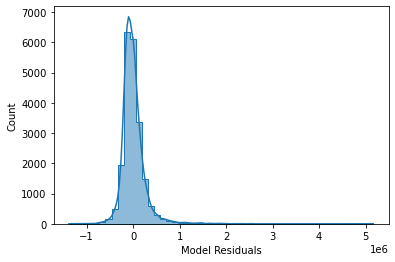

In [69]:
fig, ax = plt.subplots()
sns.histplot(modelg.resid, bins=50, element="step", kde=True, ax=ax)
ax.set_xlabel("Model Residuals")
fig.suptitle("");

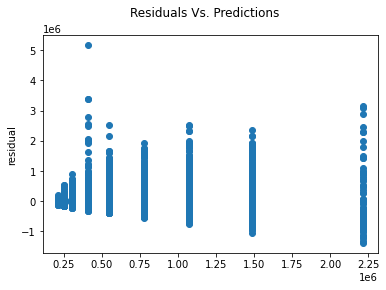

In [70]:
model_preds = modelg.predict(xcon_grade)
resids1 = y - model_preds

fig, ax = plt.subplots()

ax.scatter(model_preds, resids1)
ax.set_xlabel('')
ax.set_ylabel('residual')
plt.suptitle('Residuals Vs. Predictions');

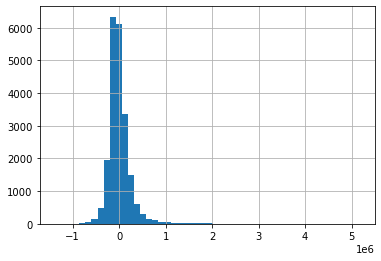

In [71]:
resids1.hist(bins=50);

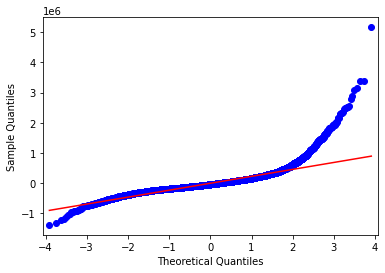

In [72]:
sm.qqplot(resids1, line='r');

### model with grade, yr built, floors, waterfront

In [73]:
water = pd.get_dummies(df['waterfront'], drop_first=True)

In [74]:
condi = pd.get_dummies(df['condition'], drop_first=True)

In [75]:
X = pd.concat([x3_f, df['yr_built'], df['floors'], condi, water], axis=1)
# X = pd.concat([x3, df['floors']], axis=1)
X

NameError: name 'x3_f' is not defined

In [76]:
X_con = sm.add_constant(X)
# y=df['price']

model = sm.OLS(Y, X_con).fit()
model.summary()

NameError: name 'X' is not defined

NameError: name 'model' is not defined

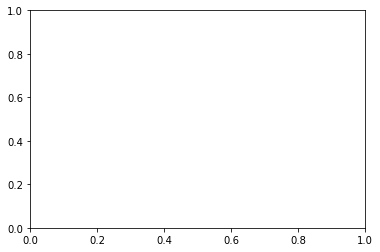

In [77]:
fig, ax = plt.subplots()
sns.histplot(model.resid, bins='auto', element="step", kde=True, ax=ax)
ax.set_xlabel("Model Residuals")
fig.suptitle("");